In [12]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset

combined_set=pd.merge(ride_data, city_data, on=('city') ,how='left')

# Display the data table for preview
combined_set.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

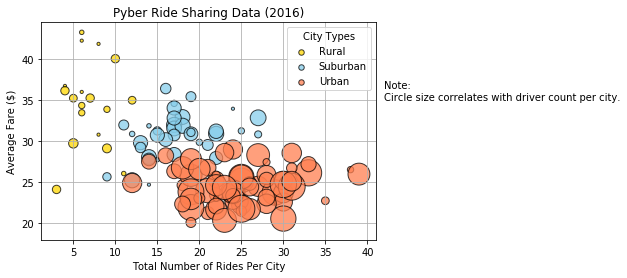

In [13]:
# Obtain the x and y coordinates for each of the three city types
rural_data=combined_set.loc[combined_set["type"]=="Rural"]
rural_group=rural_data.groupby("city")
rural_graph=rural_group.count()
rural_graph["Number of Rides"]=rural_graph["ride_id"]
rural_graph["Number of Drivers"]=rural_group["driver_count"].max()
rural_graph["Avg Fare"]=rural_group["fare"].mean()
rural_graph=rural_graph[["Number of Rides", "Avg Fare", "Number of Drivers" ]]

suburban_data=combined_set.loc[combined_set["type"]=="Suburban"]
suburban_group=suburban_data.groupby("city")
suburban_graph=suburban_group.count()
suburban_graph["Number of Rides"]=suburban_graph["ride_id"]
suburban_graph["Number of Drivers"]=suburban_group["driver_count"].max()
suburban_graph["Avg Fare"]=suburban_group["fare"].mean()
suburban_graph=suburban_graph[["Number of Rides", "Avg Fare", "Number of Drivers" ]]

urban_data=combined_set.loc[combined_set["type"]=="Urban"]
urban_group=urban_data.groupby("city")
urban_graph=urban_group.count()
urban_graph["Number of Rides"]=urban_graph["ride_id"]
urban_graph["Number of Drivers"]=urban_group["driver_count"].max()
urban_graph["Avg Fare"]=urban_group["fare"].mean()
urban_graph=urban_graph[["Number of Rides", "Avg Fare", "Number of Drivers" ]]

# Build the scatter plots for each city types
#HTML names were found on https://www.w3schools.com/colors/colors_names.asp
plt.scatter(rural_graph["Number of Rides"], rural_graph["Avg Fare"], 
            s=rural_graph["Number of Drivers"]*10,color="Gold", edgecolors="black", alpha=.75)
plt.scatter(suburban_graph["Number of Rides"], suburban_graph["Avg Fare"], 
            s=suburban_graph["Number of Drivers"]*10,color="skyblue",edgecolors="black",alpha=.75)
plt.scatter(urban_graph["Number of Rides"], urban_graph["Avg Fare"], 
            s=urban_graph["Number of Drivers"]*10 ,color="coral" ,edgecolors="black",alpha=.75)
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides Per City")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid(b=True)
plt.xlim(xmax=41)
# Create a legend
lgnd = plt.legend(labels=["Rural","Suburban","Urban"],numpoints=1,title="City Types")

#change the marker size manually for both lines
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35, "Note: \nCircle size correlates with driver count per city.", fontsize=10)
# Save Figure

plt.savefig("Pyber01.png" )

## Total Fares by City Type

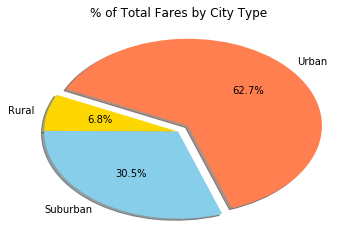

In [14]:
# Calculate Type Percents
pie_data=[]
pie_data.append(rural_data["fare"].sum())
pie_data.append(suburban_data["fare"].sum())
pie_data.append(urban_data["fare"].sum())
# Build Pie Chart
plt.pie(pie_data,labels=["Rural", "Suburban", "Urban"],shadow=True, explode=[0,.0,0.1], 
        colors=["gold","skyblue","coral"],startangle=155,autopct="%1.1f%%")
plt.title("% of Total Fares by City Type")
#So, yeah,m I picked these colors as in the last graph, they looked close to the original.
#I also picked them becuase of their funny names.
#I'm standing by this choice
# Save Figure
plt.savefig("Pyber02.png")
plt.show()

## Total Rides by City Type

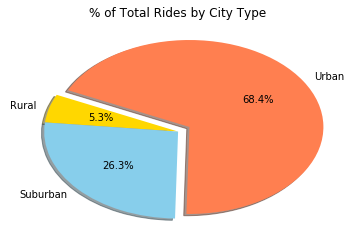

In [15]:
# Calculate Ride Percents
pie_data2=[]
pie_data2.append(rural_data["ride_id"].count())
pie_data2.append(suburban_data["ride_id"].count())
pie_data2.append(urban_data["ride_id"].count())
# Build Pie Chart
plt.pie(pie_data2,labels=["Rural", "Suburban", "Urban"],shadow=True, explode=[0,.0,0.1], 
        colors=["Gold","SkyBlue","Coral"],startangle=155,autopct="%1.1f%%")
plt.title("% of Total Rides by City Type")
#So, yeah,m I picked these colors as in the last graph, they looked close to the original.
#I also picked them becuase of their funny names.
#I'm standing by this choice


# Save Figure
plt.savefig("Pyber03.png")
plt.show()

## Total Drivers by City Type

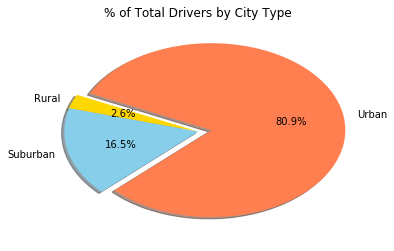

In [16]:
# Calculate Drivers Percents
pie_data3=city_data.groupby("type").sum()
# Build Pie Chart
plt.pie(pie_data3,labels=["Rural", "Suburban", "Urban"],shadow=True, explode=[0,.0,0.1], 
        colors=["Gold","skyblue","coral"],startangle=155,autopct="%1.1f%%")
plt.title("% of Total Drivers by City Type")
#So, yeah,m I picked these colors as in the last graph, they looked close to the original.
#I also picked them becuase of their funny names.
#I'm standing by this choice


# Save Figure
plt.savefig("Pyber04.png")
plt.show()


# Written Description of 3 Observable trends

## Obersvation 1:

The overall Fare prices trended inverse to the population distribution. Rural fares, overall were higher than suberurban fares, and urban fares.

## Observation 2:

Rural drivers were fewer and appeared to do more rides than urban and suburban drivers. Rural drivers were only 2.6 percent of the total drivers, but did 5.3 percent of the rides.

## Observation 3:

Urban areas that contained few drivers behaved more like other urban areas and not like suburban or rural areas with similar number of drivers.
